<a align="left" href="https://ultralytics.com/yolov5" target="_blank">
<img width="1024", src="https://user-images.githubusercontent.com/26833433/125273437-35b3fc00-e30d-11eb-9079-46f313325424.png"></a>

yolov5 간단 한글 메뉴얼

작성자: 권휘성

update: 2022-07-20

reference: https://github.com/ultralytics/yolov5

# Set up

git에 클론하여 yolov5 받아오는 과정

yolov5라는 폴더 생성

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone

나머지 필요한 모듈 install

In [ ]:
%cd yolov5
%pip install -qr requirements.txt  # install

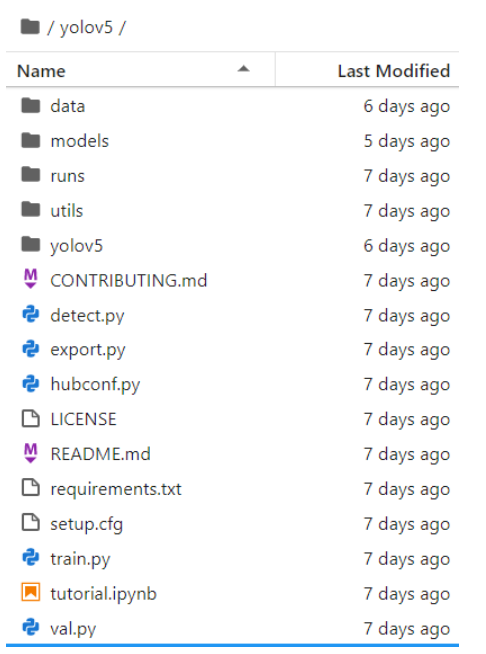

models - 다양한 pre-trained 모델

runs - train, val, test한 기록들


# Data Preparing

필요한 데이터: 이미지 데이터, 라벨

----

데이터 얻는 법: 
1. [Roboflow](https://public.roboflow.com/): 이미지, 라벨 관리하기 좋은 툴을 제공. 

2.  직접 생성

    - label 데이터 만들기
    
        - 파일명은 확장자명만 다르고 동일.
        
        - 하나의 object 당 하나의 row
    
        - row 구성: class x_center y_center width height
    
        - Box 값들은 normalized xywh
    
    예시
    
    ---
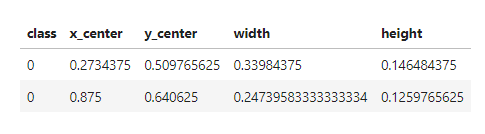
    ---
    
    - **yaml 파일 만들기**
    
    예시
    
    ---
    path: #dataset root directory

    train: ../train/images #train directory

    val: ../valid/images  #val directory

    test: #test directory

    nc: 7 #클래스의 수

    names: ['fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish', 'stingray'] #클래스의 종류

    ---
    
    
폴더 구성 - 이미지와 라벨을 분리 | train,valid,test 마다

![image.png](attachment:33fe1fb0-3b13-4536-ba6a-c6329239368f.png)



In [ ]:
from glob import glob
import shutil
import os

data=['train','valid','test']

for i in data:
    source='./data/images' + i + '/'
    images='./data/images' + i
    labels='./data/labels/' + i
    my_dict={
        images: ['jpg','png','gif','jpeg','JPG']
        labels: ['txt','json']
    }
    for destination, extensions in my_dict.items():
        for ext in extensions:
            for file in glob(source + '*.' + ext):
                shutil.move(file, os.path.join(destination,file.split('/')[-1]))

#Roboflow aquarium dataset

[Roboflow Aquarium](https://public.roboflow.com/object-detection/aquarium/2) 페이지를  데이터 이용해 다운로드 가능

위에서 얻은 코드를 terminal에 입력하면 된다.

# Select a model

![image.png](attachment:d50eb334-fc6b-417d-8f74-b507c5bbc9b3.png)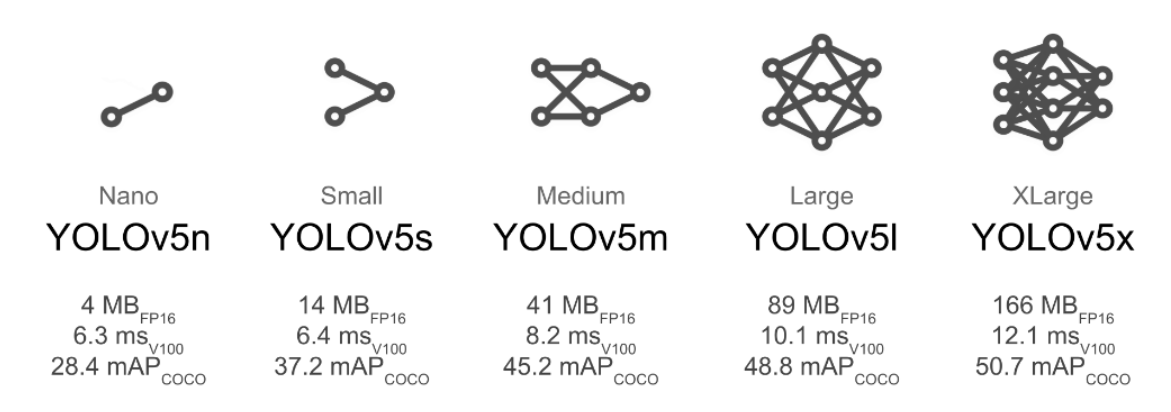

# Train

In [ ]:
#pretrained 방식

"""
python train.py --data custom.yaml --weights yolov5s.pt
                                             yolov5m.pt
                                             yolov5l.pt
                                             yolov5x.pt
                                             custom_pretrained.pt
"""

In [ ]:
#start_from_scratch 방식

"""
python train.py --data custom.yaml --weights '' --cfg yolov5s.yaml
                                                      yolov5m.yaml
                                                      yolov5l.yaml
                                                      yolov5x.yaml
"""

1. --weights: 모델의 가중치 선택 ( ex. yolov5l.pt, yolov5x.pt ..) , default=yolov5s.pt
2. --cfg: 모델의 구조 선택 (ex. yolov5l.yaml)
3. --data: 데이터에 대한 정보, data.yaml 파일 경로 입력
4. --hyp: 학습에 쓸 하이퍼파라미터 (lr, box/class loss, augmentation 등등 관련), default=ROOT / 'data/hyps/hyp.scratch-low.yaml'
5. --epochs: 학습에 쓸 epoch 수, default=300
6. --imgsz: 모델에 넣을 이미지 크기, default=640
7. --batch: batch size, default=16
8. --cache: traing 속도를 빠르게 할 수 있으나 많은 ram/disk 소모 (ex. cache ram, cache disk)
9. --resume: 중단된 학습을 재개 가능.
10. --name: 프로젝트를 저장할 경로
11. --optimizer: 최적화 방법. [SGD,Adam, AdamW] default=SGD
12. --patience: mAP의 개선이 없을 때 EarlyStopping을 강제하는 epoch 수. default=100'
13. --rect: 사각형 방식의 이미지 training을 할 것인지 결정
14. --nosave: 오직 final checkpoint만 저장.
15. --noval: 오직 마지막 epoch에서만 validate.
16. --noautoanchor: AutoAnchor를 사용할 것인지 결정
17. --noplots: plot file을 저장할지 말지 결정.
18. --evolve: 가장 좋은 hyperparameter를 찾는 과정을 포함할 것인지 결정.
19. --bucket: 버킷을 생성할 것인지 결정
20. --image-weights: 이미지를 이전 epoch training에서 inverse mAP로 가중치된 traing set에서 샘플링할지 결정.
21. --device: 어떤 device 사용할 것인지 결정 (ex. 0 or 0,1,2,3 or cpu)
22. --multi-scale: 이미지마다 다른 이미지 크기를 사용할 것인지 결정
23. --single-cls: multi-class data를 single-class 데이터로 train할 것인지 결정.
24. --sync-bn: multi GPU 옵션.
25. --workers: dataloader workers 수 지정. default=8
26. --project: 작업 결과물 어디에 저장할지 결정. default=ROOT / 'runs/train'
27. --name: 작업 결과 저장할 폴더명. default='exp'
28. --exist-ok: 기존에 존재하는 project 이름을 써도 괜찮은지 결정.
29. --quad: dataloader를 quad 형태로 할지 결정.
30. --cos-lr: Learning rate scheduler 결정.
31. --label-smoothing: label smoothing할 정도를 결정. default=0.0
32. --freeze: 얼마나 많은 layer를 freeze할 것인지 지정.
33. --seed: seed 지정. defualt=0
34. --save-period: check point를 매 어떤 x epoch마다 저장할 것인지 지정.
35. --local_rank: 분산 GPU를 쓸 때, 로컬 순위를 지정. default=-1

- weights & Biases arguments

36. --entity: entity 지정, default=None
37. --upload_dataset: 올릴 dataset 지정, default=False
38. --bbox_interval: bounding-boxt image logging interval 지정, defualt=-1
39. --artifact_alias: 사용할 artifact dataset 버전 지정, default='latest

In [ ]:
#epochs: 100, weights-yolov5l
!python /home/jovyan/yolov5/train.py --data /home/jovyan/data.yaml --epochs 100 --weights /home/jovyan/yolov5/yolov5l.pt

train: weights=/home/jovyan/yolov5/yolov5l.pt, cfg=, data=/home/jovyan/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (37/37), done.
remote: Total 51 (delta 37), reused 37 (delta 37), pack-reused 14
Unpacking objects: 100% (51/51), done.
From https://github.com/ultralytics/yolov5
   fdc9d91..526e650  master     -> origin/master
   c34056f..29657d1  classifier -> origin/classifier
github: ⚠️ YOLOv5 is out of date by 14 commits. Use `g

In [ ]:
#epochs: 500, weights: yolov5l, hyp: scratch-high.yaml, imgsz: 960, patience: 50
!python /home/jovyan/yolov5/train.py --data /home/jovyan/data.yaml --epochs 500 --weights /home/jovyan/yolov5/yolov5l.pt --hyp /home/jovyan/yolov5/data/hyps/hyp.scratch-high.yaml --imgsz 960 --patience 50 

train: weights=/home/jovyan/yolov5/yolov5l.pt, cfg=, data=/home/jovyan/data.yaml, hyp=/home/jovyan/yolov5/data/hyps/hyp.scratch-high.yaml, epochs=500, batch_size=16, imgsz=960, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=50, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 14 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
Python 3.7.0 required by YOLOv5, but Python 3.6.9 is currently installed
YOLOv5 🚀 v6.1-275-g29d79a6 Python-3.6.9 torch-1.8.1+cu111 CUDA:0 (NVIDIA GeForce RTX 3090, 24260MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.

In [ ]:
#epochs: 1000, weights: yolov5l, hyp: scratch-high.yaml, imgsz: 640, patience: 100
!python /home/jovyan/yolov5/train.py --data /home/jovyan/data.yaml --epochs 1000 --weights /home/jovyan/yolov5/yolov5l.pt --hyp /home/jovyan/yolov5/data/hyps/hyp.scratch-high.yaml --imgsz 640 --patience 100 

# Val

In [ ]:

"""
python val.py --data custom.yaml --weights yolov5s.pt
                                             yolov5m.pt
                                             yolov5l.pt
                                             yolov5x.pt
                                             custom_pretrained.pt
"""

학습 시킨 모델을 바탕으로 val.py를 실행시켜 성능을 추정해볼 수 있다.

1. --data: 데이터에 대한 정보, data.yaml 파일 경로 입력
2. --weights: 사용할 모델 선택 ( ex. yolov5l.pt, yolov5x.pt ..) , default=ROOT / 'yolov5s.pt'
3. --batch-size: batch size, default=32
4. --imgsz: 모델에 넣을 이미지 크기, default=640
5. --conf-thres: confidence threshold 결정, default=0.001
6. --iou-thres: IoU threshold 결정, default: 0.6
7. --task: 수행할 작업 결정, default=val
8. --device: 어떤 device 사용할 것인지 결정 (ex. 0 or 0,1,2,3 or cpu)
9. --workers: dataloader workers 수 지정. default=8
10. --single-cls: multi-class data를 single-class 데이터로 train할 것인지 결정.
11. --augment: augmentation을 어떻게 할 것인지 결정.
12. --verbose: 결과를 class별로 볼 것인지 결정.
13. --save-txt: 결과를 txt 형태의 파일로 저장할 것인지 결정.
14. --save-hybrid: 라벨과 예상치를 txt에 hybrid로 저장할 것인지 결정.
15. --save-conf: confidence를 --save-txt 라벨에 저장할 것인지 결정.
16. --save-json: json 결과 파일을 저장할 것인지 결정
17. --project: 작업 결과물 어디에 저장할지 결정. default=ROOT / 'runs/train'
18. --name: 작업 결과 저장할 폴더명. default='exp'
19. --exist-ok: 기존에 존재하는 project 이름을 써도 괜찮은지 결정.
20. --half: half-precison inference를 할 것인지 결정.
21. --dnn: OpenCV DNN을 사용할 것인지 결정.

In [ ]:
#epochs: 100, weights-yolov5l
!python /home/jovyan/yolov5/val.py --data /home/jovyan/data.yaml --weights /home/jovyan/yolov5/runs/train/exp44/weights/best.pt

val: data=/home/jovyan/data.yaml, weights=['/home/jovyan/yolov5/runs/train/exp44/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
Python 3.7.0 required by YOLOv5, but Python 3.6.9 is currently installed
YOLOv5 🚀 v6.1-275-g29d79a6 Python-3.6.9 torch-1.8.1+cu111 CUDA:0 (NVIDIA GeForce RTX 3090, 24260MiB)

Fusing layers... 
Model summary: 367 layers, 46140588 parameters, 0 gradients, 107.9 GFLOPs
val: Scanning '/home/jovyan/yolov5/../valid/labels.cache' images and labels... 1
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.828       0.79      0.803      0.518
                fish        127        459      0.842      0.819      0.863      0.524
           jellyfi

In [ ]:
#epochs: 500, weights: yolov5l, hyp: scratch-high.yaml, imgsz: 960, patience: 50
!python /home/jovyan/yolov5/val.py --data /home/jovyan/data.yaml --weights /home/jovyan/yolov5/runs/train/exp45/weights/best.pt

val: data=/home/jovyan/data.yaml, weights=['/home/jovyan/yolov5/runs/train/exp45/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
Python 3.7.0 required by YOLOv5, but Python 3.6.9 is currently installed
YOLOv5 🚀 v6.1-275-g29d79a6 Python-3.6.9 torch-1.8.1+cu111 CUDA:0 (NVIDIA GeForce RTX 3090, 24260MiB)

Fusing layers... 
Model summary: 367 layers, 46140588 parameters, 0 gradients, 107.9 GFLOPs
val: Scanning '/home/jovyan/yolov5/../valid/labels.cache' images and labels... 1
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909        0.8      0.765      0.789      0.493
                fish        127        459      0.839      0.802      0.838      0.499
           jellyfish     

In [ ]:
#세 번째 모델
!python /home/jovyan/yolov5/val.py --data /home/jovyan/data.yaml --weights /home/jovyan/yolov5/runs/train/exp47/weights/best.pt

val: data=/home/jovyan/data.yaml, weights=['/home/jovyan/yolov5/runs/train/exp47/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
Python 3.7.0 required by YOLOv5, but Python 3.6.9 is currently installed
YOLOv5 🚀 v6.1-275-g29d79a6 Python-3.6.9 torch-1.8.1+cu111 CUDA:0 (NVIDIA GeForce RTX 3090, 24260MiB)

Fusing layers... 
Model summary: 367 layers, 46140588 parameters, 0 gradients, 107.9 GFLOPs
val: Scanning '/home/jovyan/yolov5/../valid/labels.cache' images and labels... 1
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.824      0.791      0.818      0.512
                fish        127        459      0.822        0.8      0.847      0.503
           jellyfi

# Result

학습을 한 모델의 학습 과정 결과와 validate한 결과도 알 수 있다.

가장 mAP 값이 높았던 세 번째 훈련으로 결과를 보겠다.

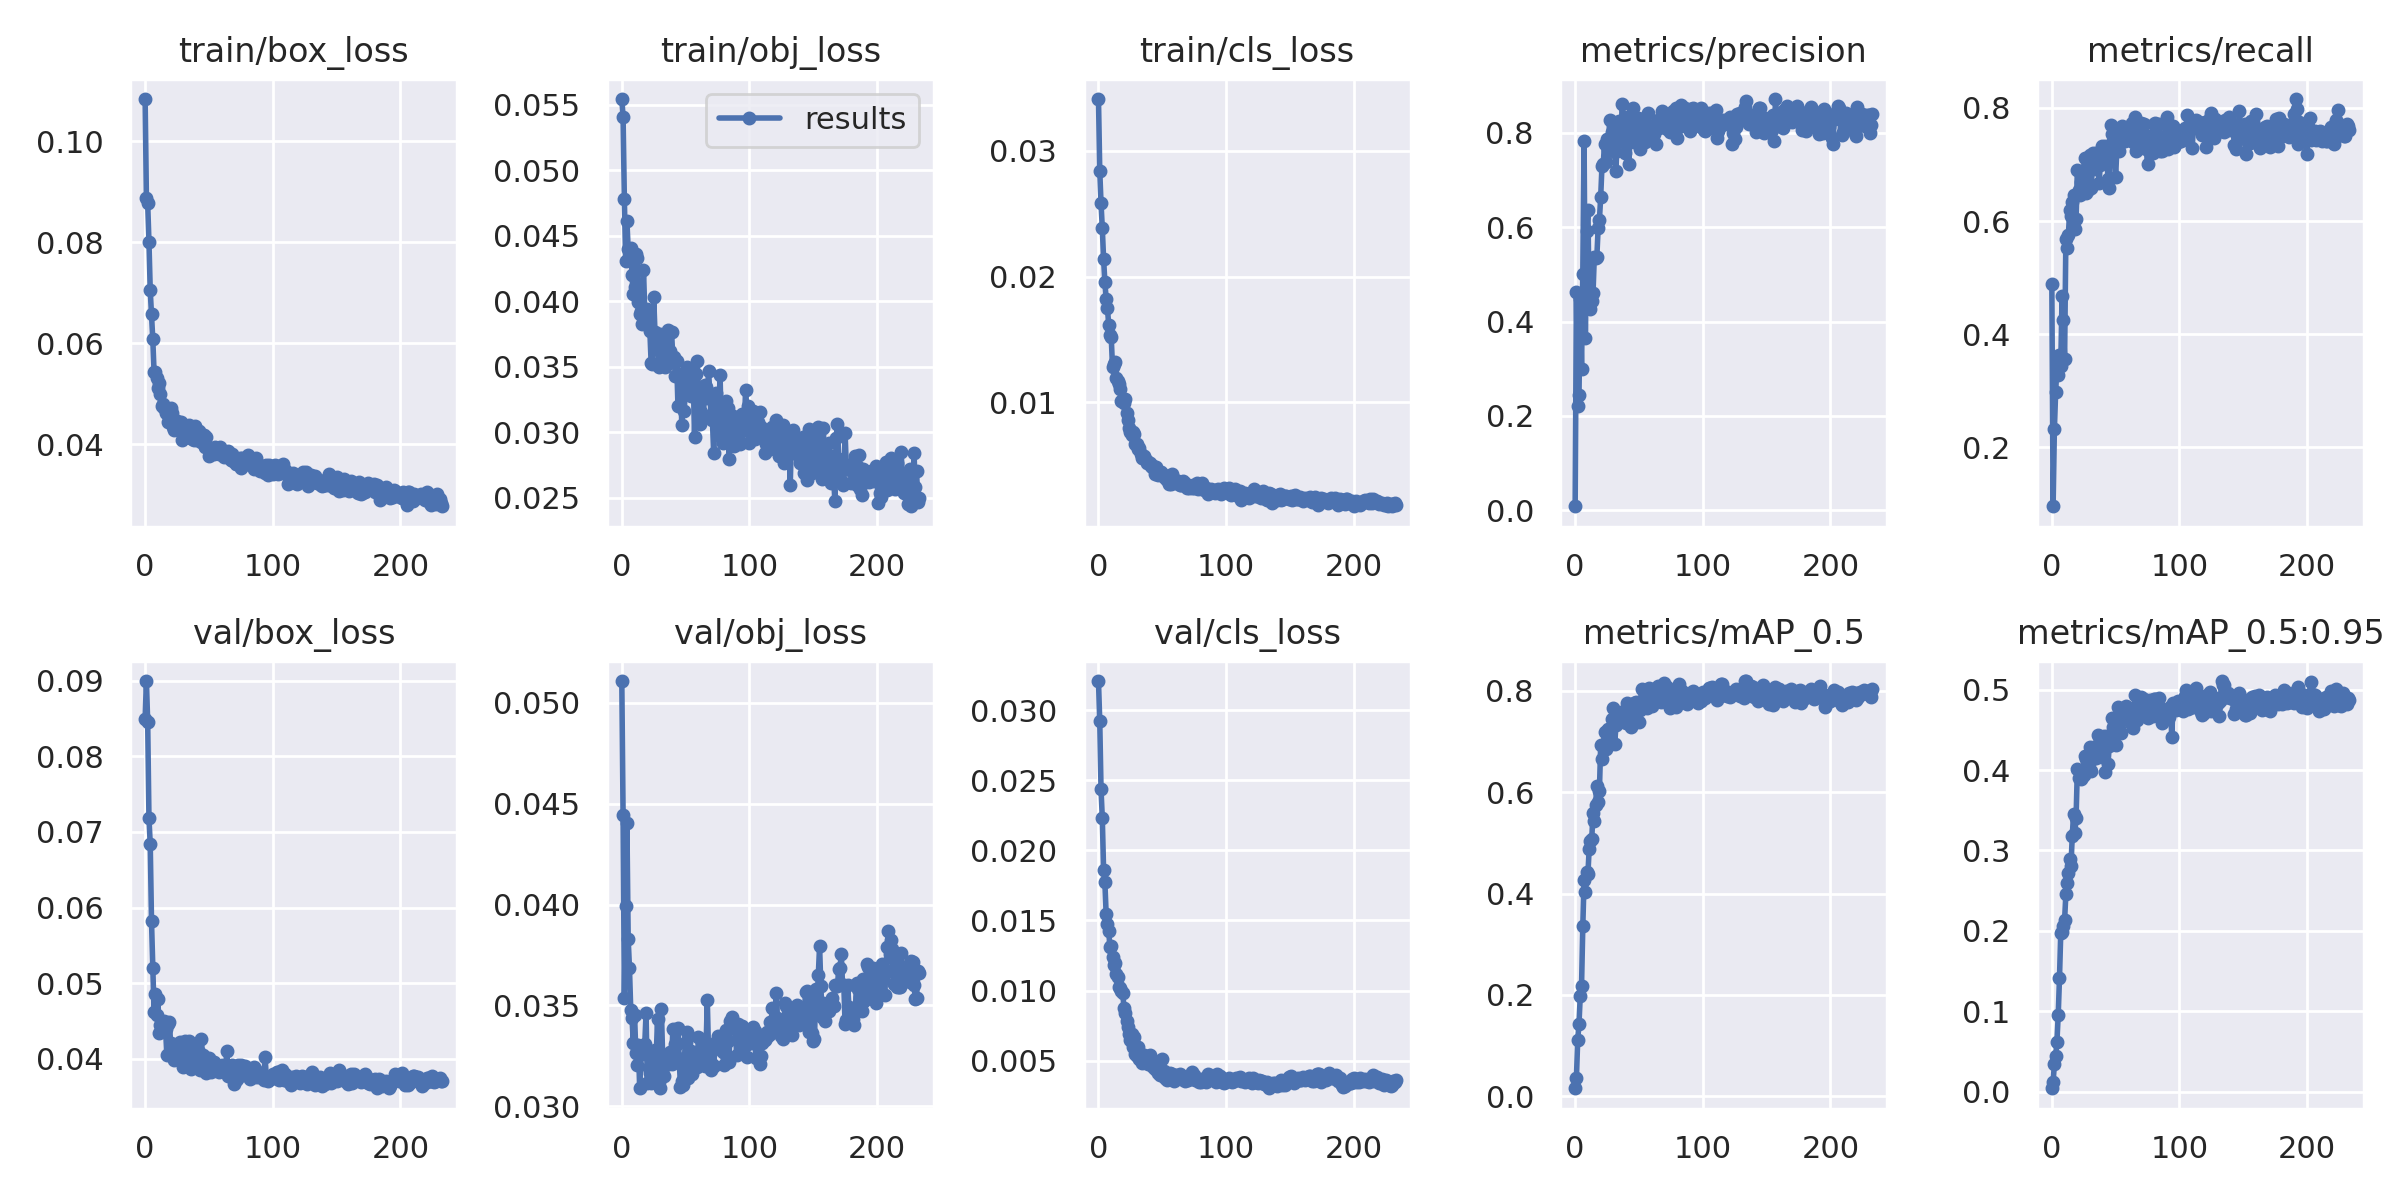

In [ ]:
from PIL import Image
img = Image. open('/home/jovyan/yolov5/runs/train/exp47/results.png')
img. show()

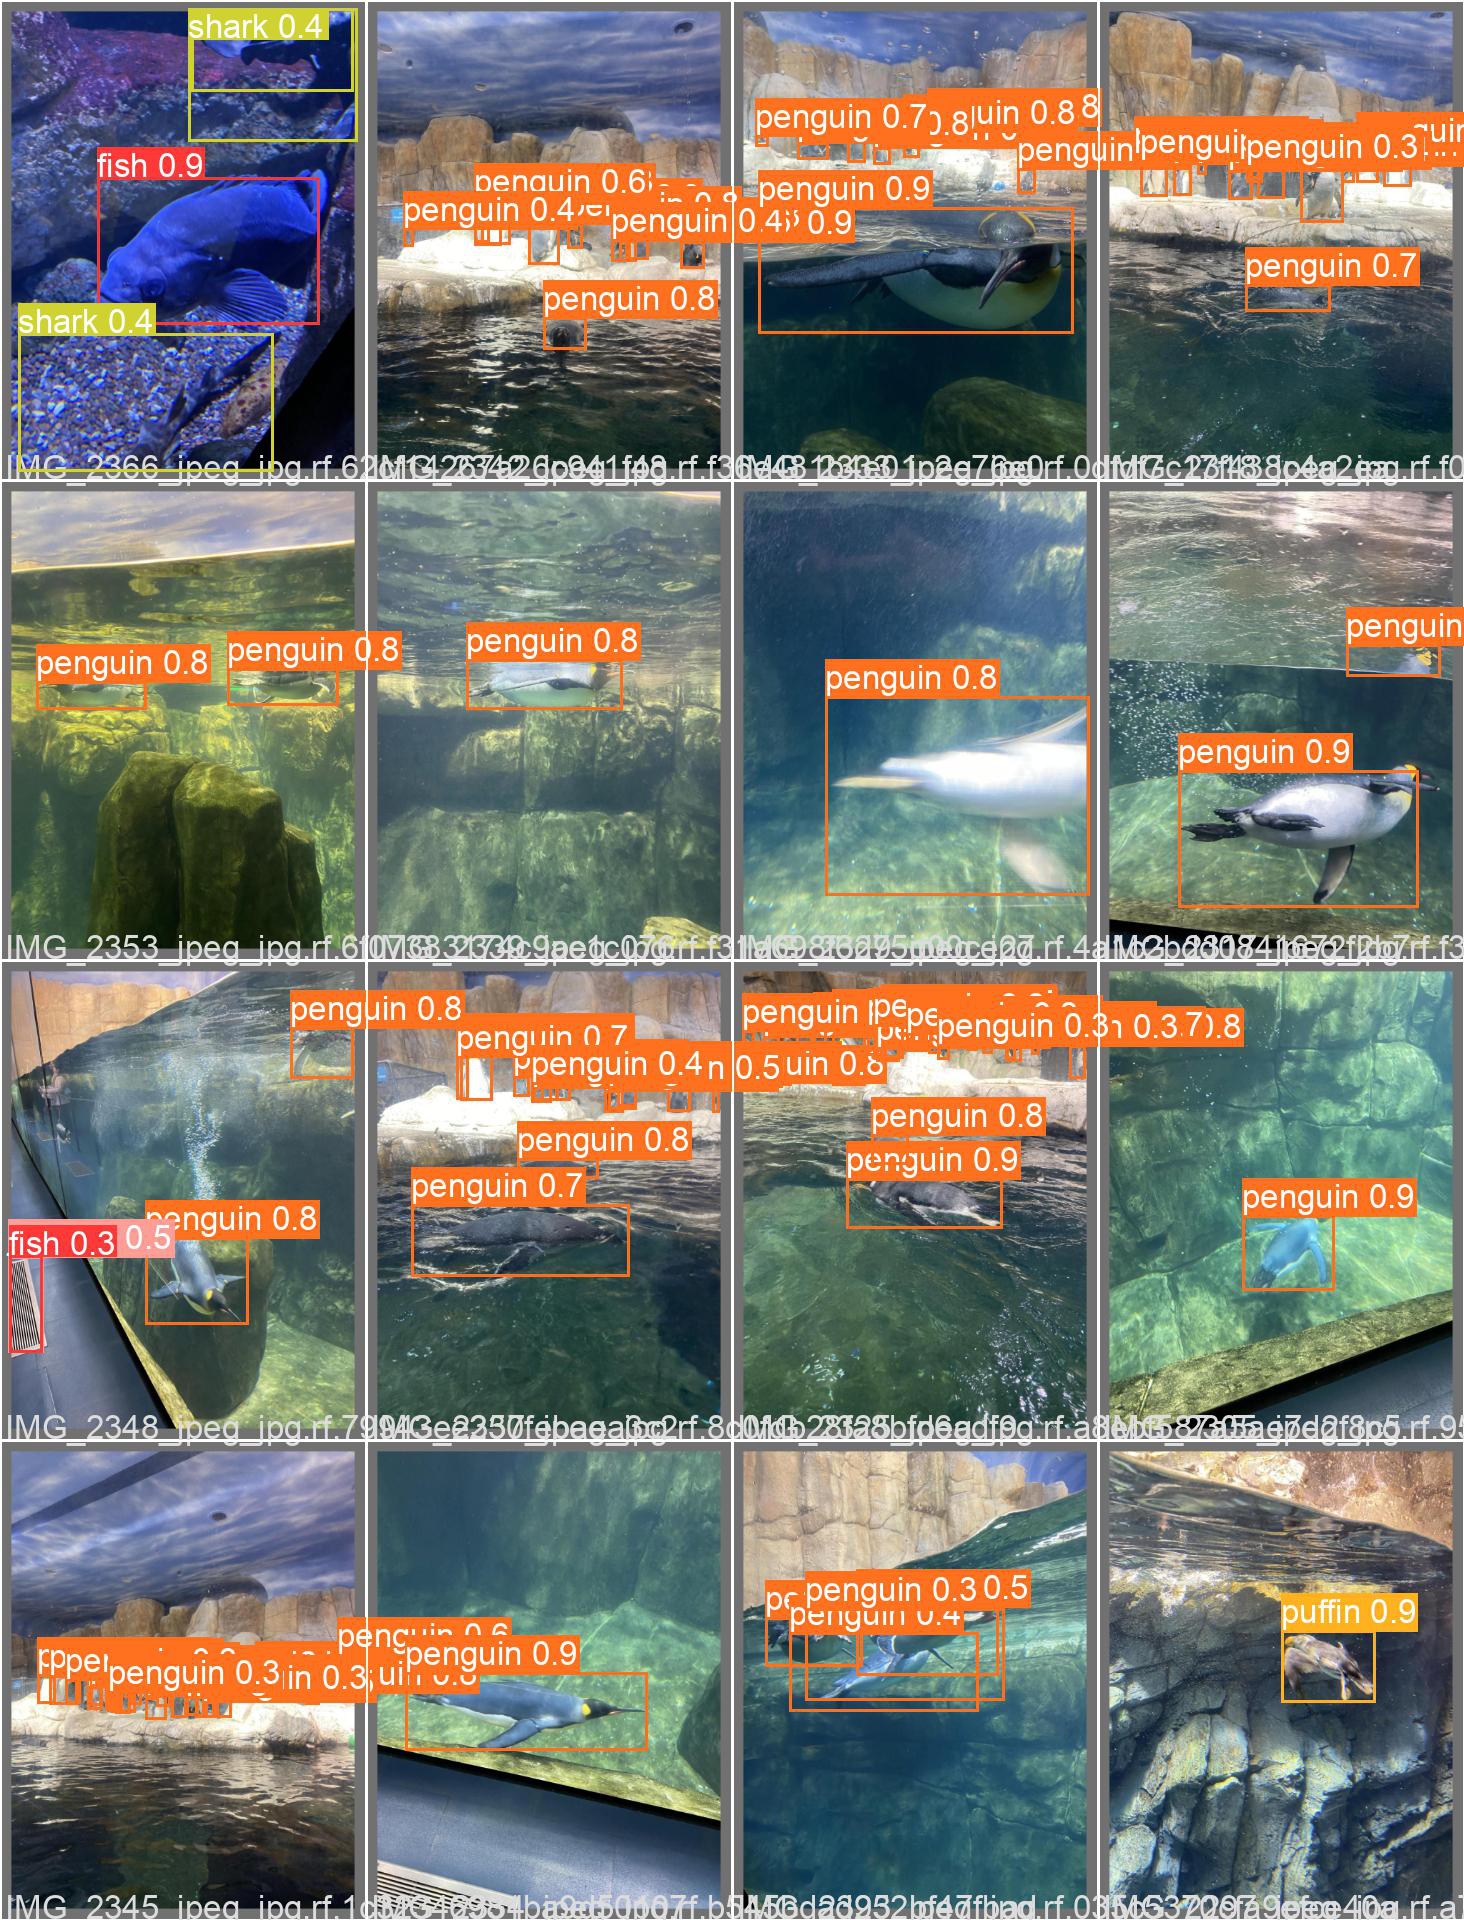

In [ ]:
from PIL import Image
img = Image. open('/home/jovyan/yolov5/runs/train/exp47/val_batch2_pred.jpg')
img. show()

# Detect

학습 시킨 모델을 토대로 이미지나 동영상이든 다양한 source들을 넣었을 때 라벨을 해줄 수 있다.

1. --weights: 사용할 모델 선택 ( ex. yolov5l.pt, yolov5x.pt ..) , default=yolov5s.pt
2. --source: task를 수행할 파일
3. --data: 데이터에 대한 정보, data.yaml 파일 경로 입력
4. --imgsz: 모델에 넣을 이미지 크기, default=640
5. --conf-thres: confidence threshold 결정, default=0.25
6. --iou-thres: IoU threshold 결정, default: 0.45
7. --max-det: 이미지당 최대 몇 개의 객체를 탐지할 것인지 결정. default=1000
8. --device: 어떤 device 사용할 것인지 결정 (ex. 0 or 0,1,2,3 or cpu)
9. --view-img: 결과를 이미지로 보여줄 것인지 결정
10. --save-txt: 결과를 txt 형태의 파일로 저장할 것인지 결정.
11. --save-conf: confidence를 --save-txt 라벨에 저장할 것인지 결정.
12. --save-crop: cropped prediction box를 저장할 것인지 결정.
13. --nosave: 결과를 저장 안 할 것인지 결정.
14. --classes: class별로 filter 진행.
15. --agnostic-nms: 사물의 분류 정보 없이 bounding box만 줄 것인지 결정.
16. --augment: augmentation을 어떻게 할 것인지 결정.
17. --visualize: feature를 시각화할 것인지 결정.
18. --update: 업데이트할 모델 결정
19. --project: 작업 결과물 어디에 저장할지 결정. default=ROOT / 'runs/train'
20. --name: 작업 결과 저장할 폴더명. default='exp'
21. --exist-ok: 기존에 존재하는 project 이름을 써도 괜찮은지 결정.
22. --line-thickness: bounding box의 굵기 결정
23. --hide-labels: 라벨을 숨길 것인지 결정.
24. --hide-conf: confidence를 숨길 것인지 결정.
25. --half: half precision inference를 할 것인지 결정.
26. -dnn: OpenCV DNN을 사용할 것인지 결정.

In [ ]:
!python /home/jovyan/yolov5/detect.py --weights /home/jovyan/yolov5/runs/train/exp47/weights/best.pt --source "/home/jovyan/datasets/valid/images/IMG_2278_jpeg_jpg.rf.3c7006d683b0fc62b9b5d84a2868c31c.jpg"

detect: weights=['/home/jovyan/yolov5/runs/train/exp47/weights/best.pt'], source=/home/jovyan/datasets/valid/images/IMG_2278_jpeg_jpg.rf.3c7006d683b0fc62b9b5d84a2868c31c.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
Python 3.7.0 required by YOLOv5, but Python 3.6.9 is currently installed
YOLOv5 🚀 v6.1-275-g29d79a6 Python-3.6.9 torch-1.8.1+cu111 CUDA:0 (NVIDIA GeForce RTX 3090, 24260MiB)

Fusing layers... 
Model summary: 367 layers, 46140588 parameters, 0 gradients, 107.9 GFLOPs
image 1/1 /home/jovyan/datasets/valid/images/IMG_2278_jpeg_jpg.rf.3c7006d683b0fc62b9b5d84a2868c31c.jpg: 640x480 8 fishs, Done. (0.013s)
Speed: 0.3ms pre-process, 1

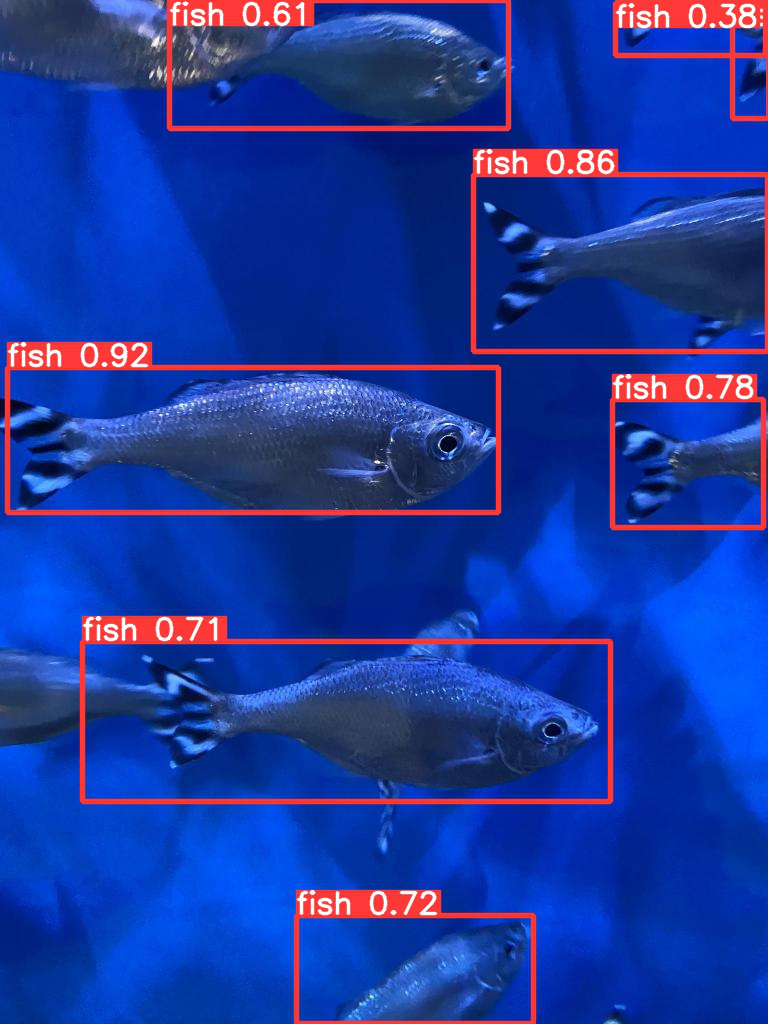

In [ ]:
from PIL import Image
img = Image. open('/home/jovyan/yolov5/runs/detect/exp4/IMG_2278_jpeg_jpg.rf.3c7006d683b0fc62b9b5d84a2868c31c.jpg')
img. show()

# 성능을 높이는 tip

1. 데이터 셋이 충분히 크고 라벨링이 정확하게 되어야 한다.
2. Background 이미지 넣기 -> Background 이미지를 넣어주면 False Positives 가 줄어드는 효과. 전체 학습 데이터 셋에 0-10% 정도 넣는 것을 추천.
3. Pretrained weights 사용하기
4. Epoch는 300부터 시작해서 overfit이 발생하면 줄이고 발생하지 않으면 600 1200 등으로 점점 늘린다.
5. 이미지 사이즈의 경우, 작은 크기의 물체가 많을 수록 높거나 원래의 해상도 사이즈를 쓰면 좋다. 최고의 추론 성능을 내려면 인퍼런스 돌릴 때 input으로 들어가는 이미지 사이즈가 학습 때 설정한 이미지 사이즈와 같아야 한다.
6. 기본값으로 저장된 모델 하이퍼파라미터들은 data 폴더 안에 hyp.scatch.yaml에서 찾을 수 있고 먼저 이 하이퍼파라미터로 학습하고 baseline으로 설정하는 것을 추천.